In [1]:
from keras.models import load_model
model = load_model('get_image\cnn_all_letter_conn2d_3_5_depoint_20.h5')

d:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [71]:
from keras.utils.np_utils import to_categorical
from PIL import Image as pilImage
import os
import string

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

characters = string.digits +  string.ascii_letters 
#characters = string.digits +  "ABCDEFGHJKLMNOPQRSTUVWXYZabdefghijlnqrty"
width, height, n_len, n_class = 120, 36, 4, len(characters)
print(characters, n_class)

def decode(y,i):
    y = np.argmax(np.array(y), axis=2)[:,i]
    return ''.join([characters[x] for x in y])

thread_hold = 600
def is_white(color):
    return color > thread_hold

def depoint(img):   
    pixdata = img.load()
    w,h = img.size
    for y in range(1,h-2):
        last_color = sum(pixdata[0,y])
        next_color = sum(pixdata[1,y])
        for x in range(1,w-2):
            up_color  = sum(pixdata[x,y - 1])
            down_color = sum(pixdata[x, y + 1])
            color = next_color
            next_color = sum(pixdata[x+1,y])
            if is_white(color):
                pixdata[x,y]=(255,255,255)
            else:
                if is_white(last_color) and is_white(next_color) or is_white(up_color) and is_white(down_color):
                    pixdata[x,y] = (255,255,255)
            last_color = color
    return img

def gen(batch_size=32, show_img = False):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    # generator = ImageCaptcha(width=width, height=height)
  
    counter = 0
    while True: 
        list_dirs = os.walk(".\\get_image\\img") 
        for root, dirs, files in list_dirs: 
            for f in files: 
                file = os.path.join(root, f) 
                #print(f,file)
                img = pilImage.open(file)
                if show_img:
                    plt.title('real: %s'%(f))
                    plt.imshow(img, cmap='gray')
                    plt.show()
                    plt.imshow(depoint(img),cmap='gray')
                    plt.show()
                X[counter] = depoint(depoint(img))
                for j, ch in enumerate(f[0:4]):
                    y[j][counter, :] = 0
                    y[j][counter, characters.find(ch)] = 1
                counter += 1
                if counter == batch_size:
                    yield X, y
                    #print('counter=%d',counter)
                    counter = 0

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ 62


In [72]:

genImg1=gen(1 ,True)


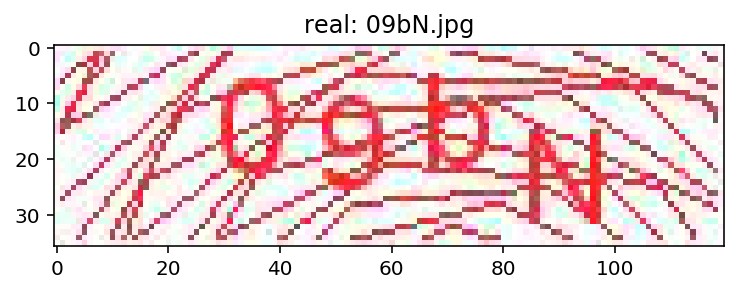

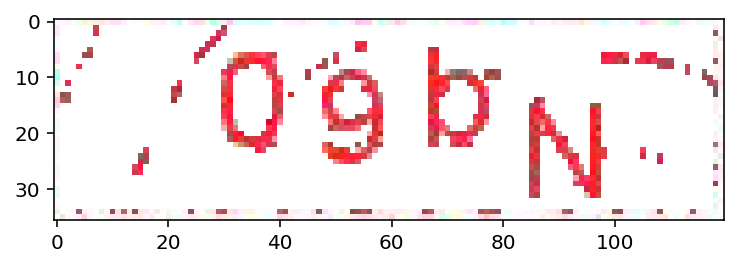

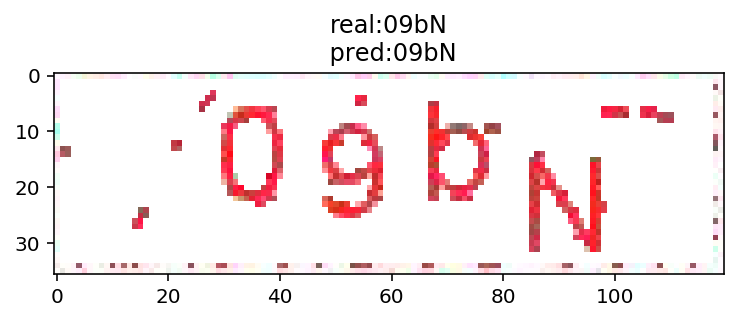

In [86]:
#X, y = next(genfile("4297.png"))
import numpy as np
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random



X, y = next(genImg1)

y_pred = model.predict(X)

plt.title('real:%s\n pred:%s'%( decode(y,0 ), decode(y_pred, 0)))
plt.imshow(X[0], cmap='gray')
plt.show()
#plt.axis('off')

In [88]:
from tqdm import tqdm
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen()
    for i in tqdm(range(batch_num)):
        X, y = next(generator)
        y_pred = model.predict(X)
#        batch_acc += np.mean(list(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T)))
        batch_acc += np.mean(list(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T)))
    return batch_acc / batch_num

evaluate(model)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.65it/s]


0.49375

In [ ]:
from keras.models import load_model
 
model = load_model('cnn.h5')